In [1]:
# %reset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import math
import datetime 
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy.stats import describe
from scipy import stats
from pylab import plt, mpl
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
import random

In [3]:
from arch import arch_model
import matrix_optimize
from matrix_optimize import port_ret, port_vol, min_vol, eff_vol, sharpe_ratio, efficient_frontier, tangent_portfolio

In [4]:
plt.style.use('seaborn')

In [5]:
mydict = {'IGF': 'Global Infrastructure', 
          'IFGL':'International Developed Real Estate ETF',
          'IXN': 'iShares Global Tech ETF',
          'IXJ': 'iShares Global Healthcare ETF',
          'VDE': 'Vanguard Energy ETF',
          'KXI': 'iShares Global Consumer Staples ETF',
          'SPGP':'iShares Gold Producers UCITS ETF',
          'VIS': 'Vanguard Industrial ETF',
          'RXI': 'iShares Global Consumer Discretionary ETF'
         }
# List shares of interest as Yahoo Fiance "Ticker"/"Symbol"
mylist = list(mydict)[:]
noa = len(mylist)

# Load Data
rets = pd.read_excel(r'C:\Users\Ma-Bi\OneDrive\Kandidat\Topics in Financial Econometrics - Seminar\log_rets.xlsx', 
                   sheet_name='Sheet', index=True, index_col=[0])
rets.head()

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
Date,,,,,,,,,
2012-01-04,-0.535872,-0.231571,-0.016714,-0.615608,0.298946,-0.716318,-0.200287,0.425633,0.019647
2012-01-05,-0.959820,-0.931686,0.150258,-0.247318,-0.424549,-0.555680,0.000000,0.125751,0.000000
2012-01-06,-1.273904,-1.137487,-0.217101,-0.194751,-0.611118,-0.862134,0.649500,-0.141489,-0.039307
2012-01-09,0.578314,0.589956,-0.100376,0.123992,0.378746,0.273061,-0.249316,0.783575,0.450934
2012-01-10,1.146669,1.672213,0.334160,0.494343,0.858938,0.694436,0.993525,1.410559,0.876437


In [6]:
TABLE = rets.describe()[1:3].round(3).transpose()
TABLE['skewness'] = np.array(rets.skew().round(3))
TABLE['excess kurtosis'] = np.array(rets.kurt().round(3))
TABLE['ticker'] = np.array(list(mydict)[:])
TABLE = TABLE[['ticker', 'mean', 'std', 'skewness', 'excess kurtosis']]
TABLE = TABLE.set_index(np.array(list(mydict.values())[:]))
display(TABLE)
# print(TABLE.to_latex(index=True))

,ticker,mean,std,skewness,excess kurtosis
Global Infrastructure,IGF,0.029,0.782,-0.437,2.683
International Developed Real Estate ETF,IFGL,0.029,0.842,-0.442,4.053
iShares Global Tech ETF,IXN,0.063,1.015,-0.438,2.877
iShares Global Healthcare ETF,IXJ,0.048,0.827,-0.354,2.035
Vanguard Energy ETF,VDE,-0.003,1.288,-0.204,2.025
iShares Global Consumer Staples ETF,KXI,0.034,0.688,-0.436,2.280
iShares Gold Producers UCITS ETF,SPGP,0.059,0.909,-0.345,4.223
Vanguard Industrial ETF,VIS,0.050,0.937,-0.424,2.123
iShares Global Consumer Discretionary ETF,RXI,0.050,0.887,-0.494,2.781


In [7]:
rets.head()

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
Date,,,,,,,,,
2012-01-04,-0.535872,-0.231571,-0.016714,-0.615608,0.298946,-0.716318,-0.200287,0.425633,0.019647
2012-01-05,-0.959820,-0.931686,0.150258,-0.247318,-0.424549,-0.555680,0.000000,0.125751,0.000000
2012-01-06,-1.273904,-1.137487,-0.217101,-0.194751,-0.611118,-0.862134,0.649500,-0.141489,-0.039307
2012-01-09,0.578314,0.589956,-0.100376,0.123992,0.378746,0.273061,-0.249316,0.783575,0.450934
2012-01-10,1.146669,1.672213,0.334160,0.494343,0.858938,0.694436,0.993525,1.410559,0.876437


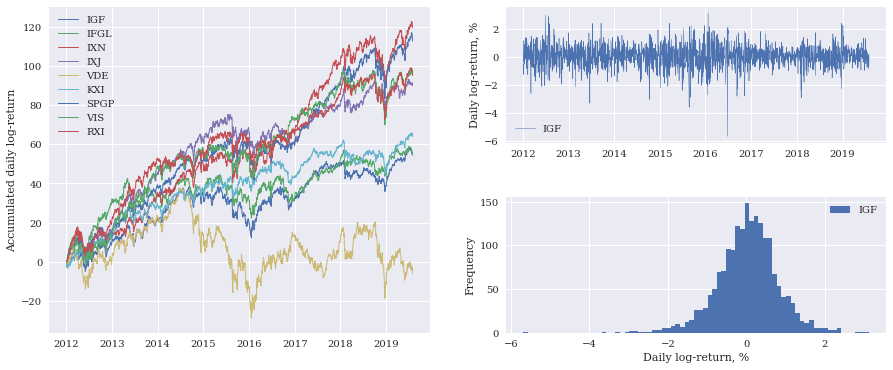

In [8]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

mpl.rcParams['font.family'] = 'serif'
#%matplotlib inline

plt.subplot(1, 2, 1)
plt.plot(rets.cumsum(), lw=1.0)
plt.ylabel('Accumulated daily log-return')
plt.legend(list(mydict))

plt.subplot(2, 2, 2)
plt.plot(rets['IGF'], lw=0.5, label='IGF')
plt.legend()
#plt.plot(rets.iloc[:, 0:5], lw=0.2)
plt.ylabel('Daily log-return, %')
#plt.legend(list(mydict)[0:5])


plt.subplot(2, 2, 4)
plt.hist(rets['IGF'], bins=75, label='IGF')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Daily log-return, %')
#plt.plot(rets.iloc[:, 5:], lw=0.2)
#plt.ylabel('Daily log-return, %')
#plt.legend(list(mydict)[5:])

#plt.show()
plt.savefig('historic_development.png', dpi=300, bbox_inches='tight')

In [12]:
# Augmented Dicke Fuller test of unit root
from statsmodels.tsa.stattools import adfuller

DF = pd.DataFrame(columns=mylist, index=['ADF Statistic', 'p-value'])

for ent in mylist:
    DF[ent] = (adfuller(rets[ent]))[:2]


display(DF.round(3))
#print(np.round(DF, 2).to_latex())
print('Rejecting the null hypothesis means that the process has no unit root, thus that the time series is stationary')

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
ADF Statistic,-23.487,-44.11,-16.959,-23.227,-43.496,-43.63,-10.67,-20.948,-43.328
p-value,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000


Rejecting the null hypothesis means that the process has no unit root, thus that the time series is stationary


In [13]:
# Random assigned weight
weights = np.random.random(noa)
weights /= np.sum(weights) 
weights

array([0.04921813, 0.0760925 , 0.08003544, 0.13308071, 0.16017844,
       0.09126461, 0.10962487, 0.14651402, 0.15399129])

In [14]:
print('Covariance Matrix \n')
print(np.round(rets.cov(), 2).to_latex())
# plt.matshow(rets.cov(), cmap='coolwarm')
# plt.show()

Covariance Matrix 

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &   IGF &  IFGL &   IXN &   IXJ &   VDE &   KXI &  SPGP &   VIS &   RXI \\
\midrule
IGF  &  0.61 &  0.52 &  0.54 &  0.45 &  0.67 &  0.42 &  0.44 &  0.51 &  0.52 \\
IFGL &  0.52 &  0.71 &  0.57 &  0.46 &  0.60 &  0.42 &  0.45 &  0.52 &  0.56 \\
IXN  &  0.54 &  0.57 &  1.03 &  0.62 &  0.77 &  0.47 &  0.79 &  0.76 &  0.76 \\
IXJ  &  0.45 &  0.46 &  0.62 &  0.68 &  0.58 &  0.42 &  0.57 &  0.57 &  0.57 \\
VDE  &  0.67 &  0.60 &  0.77 &  0.58 &  1.66 &  0.45 &  0.66 &  0.83 &  0.72 \\
KXI  &  0.42 &  0.42 &  0.47 &  0.42 &  0.45 &  0.47 &  0.40 &  0.44 &  0.46 \\
SPGP &  0.44 &  0.45 &  0.79 &  0.57 &  0.66 &  0.40 &  0.83 &  0.66 &  0.66 \\
VIS  &  0.51 &  0.52 &  0.76 &  0.57 &  0.83 &  0.44 &  0.66 &  0.88 &  0.70 \\
RXI  &  0.52 &  0.56 &  0.76 &  0.57 &  0.72 &  0.46 &  0.66 &  0.70 &  0.79 \\
\bottomrule
\end{tabular}



In [15]:
# Monte Carlo simulation of differetn weights -- NOT used

p_rets = []
p_vols = []
    
for p in range (500):
    weights = np.random.random(noa)
    weights /= np.sum(weights) 
    p_rets.append(port_ret(mu=rets.mean(),weights=weights))
    p_vols.append(port_vol(omega=rets.cov(),weights=weights))
    
p_rets = np.array(p_rets)
p_vols = np.array(p_vols)

# MATRIX


## Historically based minimum vol portfolio

In [530]:
# a. Find minimum variance weights
hist_w_min = matrix_optimize.min_vol(noa=noa, omega=rets.cov())

# b. Compute annualized portfolio return
hist_ret_min = port_ret(mu=rets.mean(),weights=hist_w_min)

# c. Compute annualized portfolio volatility
hist_vol_min = port_vol(omega=rets.cov(),weights=hist_w_min)

# d. Print results:
print('Minimum vol weights', hist_w_min)
print('Annualized portfolio return = ', hist_ret_min.round(3))
print('Annualized portfolio vol = ', hist_vol_min.round(3))
print('Maximum Sharpe Ratio = ',(hist_ret_min/hist_vol_min).round(3),
      '=', -sharpe_ratio(mu=rets.mean(), omega=rets.cov(),weights=hist_w_min).round(3))

Minimum vol weights [ 0.196  0.143 -0.234  0.099 -0.058  0.648  0.299  0.072 -0.164]
Annualized portfolio return =  8.766
Annualized portfolio vol =  10.424
Maximum Sharpe Ratio =  0.841 = 0.841


## Historically based efficient portfolio - given target return

In [531]:
# a. Find efficient weights given target return
hist_w_eff = matrix_optimize.eff_vol(noa=noa, omega=rets.cov(), mu=rets.mean(), target_return=30/252)

# b. Compute annualized portfolio return
hist_ret_eff = port_ret(mu=rets.mean(),weights=hist_w_eff)

# c. Compute annualized portfolio volatility
hist_vol_eff = port_vol(omega=rets.cov(),weights=hist_w_eff)

# d. Print resuts:
print('Efficient weights', hist_w_eff)
print('Annualized portfolio return = ', hist_ret_eff.round(3))
print('Annualized portfolio vol = ', hist_vol_eff.round(3))
print('Maximum Sharpe Ratio = ',(hist_ret_eff/hist_vol_eff).round(3),
      '=', -sharpe_ratio(mu=rets.mean(), omega=rets.cov(),weights=hist_w_eff).round(3))

Efficient weights [ 0.343 -0.441  0.465  0.279 -1.032 -0.064  0.628  0.623  0.198]
Annualized portfolio return =  29.989
Annualized portfolio vol =  21.235
Maximum Sharpe Ratio =  1.412 = 1.412


# Effecient frontier

In [532]:
hist_z, hist_front_vol, hist_front_ret = efficient_frontier(min_weights=hist_w_min,
                                                   eff_weights=hist_w_eff, omega=rets.cov(), mu=rets.mean())

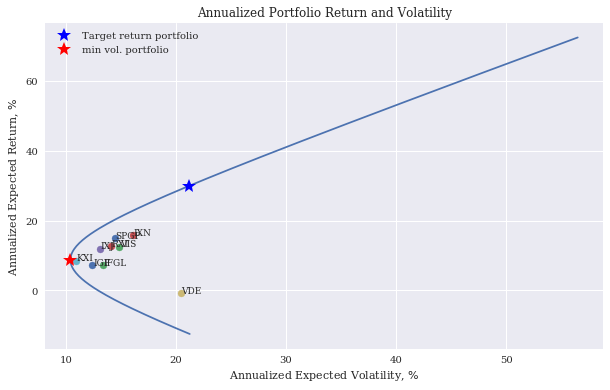

In [533]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

plt.plot(hist_front_vol, hist_front_ret)

plt.plot(hist_vol_eff, hist_ret_eff, 'b*', markersize=15.0, label='Target return portfolio')
plt.plot(hist_vol_min, hist_ret_min, 'r*', markersize=15.0, label='min vol. portfolio')

# plot individual ETFs
for i,type in enumerate(mylist):
    x2 = np.sqrt((rets[type]).var()*252)
    y2 = rets[type].mean()*252
    plt.scatter(x2, y2, marker='o')  
    plt.text(x2+0.05, y2+0.05, type, fontsize=9)
    
plt.xlabel('Annualized Expected Volatility, $\%$')
plt.ylabel('Annualized Expected Return, $\%$')
plt.title('Annualized Portfolio Return and Volatility')

plt.legend()
plt.show()

## Tangent Portfolio

In [534]:
opt, evols, erets, f_tangent = tangent_portfolio(front_vol=hist_front_vol, front_ret=hist_front_ret)

Optimal parameter values =  [ 0.      1.4226 17.6033]
Check that eq holds: [ 0.  0. -0.]


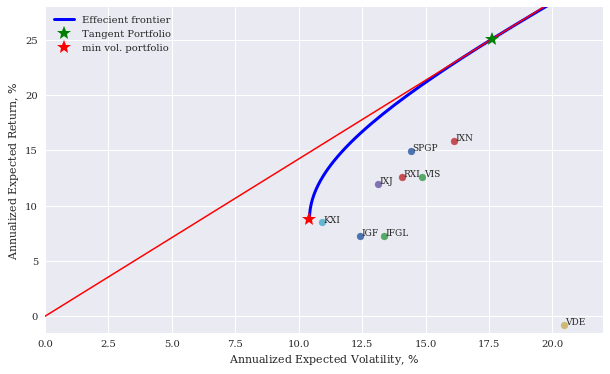

In [535]:
rf=0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

plt.plot(evols, erets, 'b', lw=3.0, label='Effecient frontier')

cx = np.linspace(0.0, 20.0)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)

plt.plot(opt[2], f_tangent, 'g*', markersize=15, label='Tangent Portfolio')
plt.plot(hist_vol_min, hist_ret_min, 'r*', markersize=15.0, label='min vol. portfolio')

# plot individual ETFs
for i,type in enumerate(mylist):
    x2 = np.sqrt((rets[type]).var()*252)
    y2 = rets[type].mean()*252
    plt.scatter(x2, y2, marker='o')  
    plt.text(x2+0.05, y2+0.05, type, fontsize=9)


plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,22])
axes.set_ylim([-1.5,28])
plt.xlabel('Annualized Expected Volatility, $\%$')
plt.ylabel('Annualized Expected Return, $\%$')
#plt.title('Historical Mean-Variance optimization')
plt.legend()

plt.savefig('tangent_port.png', dpi=300, bbox_inches='tight')

In [536]:
# a. Find tangent portfolio weight
ind = np.where(np.array(hist_front_vol.round(1)==opt[2].round(1)))[0][0]
hist_w_tan = hist_z[ind]

# b. Compute annualized portfolio return
hist_ret_tan = port_ret(mu=rets.mean(),weights=hist_w_tan)

# c. Compute annualized portfolio volatility
hist_vol_tan = port_vol(omega=rets.cov(),weights=hist_w_tan)

# d. Print resuts:
print('Efficient weights', hist_w_tan.round(3))
print('Annualized portfolio return = ', hist_ret_tan.round(3))
print('Annualized portfolio vol = ', hist_vol_tan.round(3))
print('Maximum Sharpe Ratio = ',(hist_ret_tan/hist_vol_tan).round(3),
      '=', -sharpe_ratio(mu=rets.mean(), omega=rets.cov(),weights=hist_w_tan).round(3))

Efficient weights [ 0.309 -0.306  0.303  0.237 -0.807  0.101  0.552  0.496  0.114]
Annualized portfolio return =  25.083
Annualized portfolio vol =  17.632
Maximum Sharpe Ratio =  1.423 = 1.423



# Conclusion

In [537]:
# Weights: minimum vol, max Sharpe
conc_1 = np.vstack([mylist, hist_w_min.round(3)])
conc_1 = np.vstack([conc_1, hist_w_eff.round(3)])
conc_1 = np.vstack([conc_1, hist_w_tan.round(3)])

# Portfolio return
P_R_1 = np.ones(4)
P_R_1[1:] = np.array([hist_ret_min , hist_ret_eff, hist_ret_tan]).round(3)
conc_1 = np.column_stack((conc_1, P_R_1))

# Portfolio volatility
P_V_1 = np.ones(4)
P_V_1[1:] = np.array([hist_vol_min , hist_vol_eff, hist_vol_tan]).round(3)
conc_1 = np.column_stack((conc_1, P_V_1))

# Portfolio Sharpe Ratio
P_SR_1 = np.ones(4)
P_SR_1[1:] = np.array([-sharpe_ratio(mu=rets.mean(), omega=rets.cov(),weights=hist_w_min),
                       -sharpe_ratio(mu=rets.mean(), omega=rets.cov(),weights=hist_w_eff), 
                       -sharpe_ratio(mu=rets.mean(), omega=rets.cov(),weights=hist_w_tan)]).round(3)
conc_1 = np.column_stack((conc_1, P_SR_1))

conc_1 = pd.DataFrame(conc_1, index=['Ticker', 'Minimum vol. portfolio', 
                                     'Target return portfolio', 'Tangent portfolio'])


conc_1.columns = conc_1.iloc[0]
conc_1 = conc_1.drop(conc_1.index[0])
conc_1.columns.values[[-3, -2, -1]] = ['Exp. return', 'Exp. volatility', 'Exp. SR']
conc_1

Ticker,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI,Exp. return,Exp. volatility,Exp. SR
Minimum vol. portfolio,0.196,0.143,-0.234,0.099,-0.058,0.648,0.299,0.072,-0.164,8.766,10.424,0.841
Target return portfolio,0.343,-0.441,0.465,0.279,-1.032,-0.064,0.628,0.623,0.198,29.989,21.235,1.412
Tangent portfolio,0.309,-0.306,0.303,0.237,-0.807,0.101,0.552,0.496,0.114,25.083,17.632,1.423


In [538]:
#CONC_1 = conc_1.round(2)
#print(CONC_1.astype(float).round(2).drop('Target return portfolio', axis=0).to_latex())

## Moving on to GARCH modelleing

In [644]:
n_time = 100
n_test = 60
H = -n_time+n_test

parameters = np.zeros((noa,5))                         # 4 for GARCH(1,1) and 5 for GJR-GARCH(1,1)
p_values = np.zeros((noa,5))
std_error = np.zeros((noa,5))
forecasts = np.zeros((noa,n_test))
forecast_variance = np.zeros(noa)
std_resid = np.zeros((noa,len(rets['IGF'][:-n_time])))
estimation_result = []



for i,n in enumerate(mylist):
    # split into train/test = in-sample/out-of-sample
    train, test = rets[n][:-n_time], rets[n][-n_time : H] 

    # define GARCH model
    # model = arch_model(train, mean='Constant', vol='GARCH', p=1, q=1)
    model = arch_model(train, p=1, o=1, q=1)          # GJR Garch - just change parameters to 5 instead of 4

    # fit model
    res = model.fit(disp='off')
    estimation_result.append(res)

    # Save parameter estimates
    parameters[i][:] = res.params[:]
    p_values[i][:] = res.pvalues[:]
    std_error[i][:] = res.std_err[:]
    
    # Save standardized residuals
    std_resid[i][:] = res.resid / res.conditional_volatility
    
    # forecast variance
    forecasts[i][:] = res.forecast(horizon=n_test).variance.dropna().values.T[:,0]
    forecast_variance[i] = forecasts[i].mean() # Each asset's forecasted variance for period n_test period ahead
    
df_std_resid = pd.DataFrame(std_resid).T

In [636]:
## Save to excel to check in MATLAB - They are not normal in Matlab either...
# std_resid.to_excel("std_resid.xlsx")

## CHECK whether JB works for generated random... it does.
# s = np.random.normal(0, 50, 3000)
# stats.jarque_bera(s)

In [637]:
# Normality test of Standardized residuals:
JB = []

for i in range(len(mylist)):
    JB.append(stats.jarque_bera(std_resid[i]))
    
JB
# Nul hypothesis rejected on a 5% significance level. Thus not Normal as hoped by GJR...

[(179.6444186770409, 0.0),
 (284.83851147941886, 0.0),
 (339.7634062102716, 0.0),
 (124.73082104200937, 0.0),
 (135.31863205864536, 0.0),
 (198.8566666839391, 0.0),
 (243.58269564524718, 0.0),
 (343.7174894855836, 0.0),
 (638.7317393826531, 0.0)]

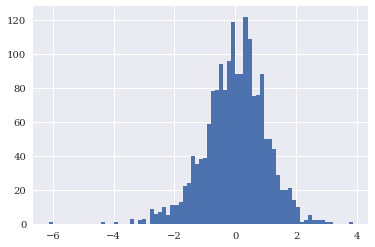

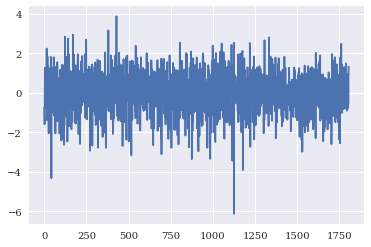

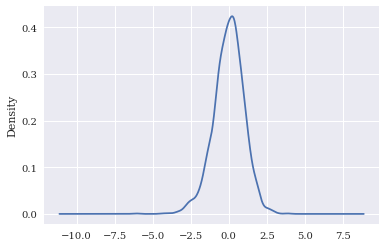

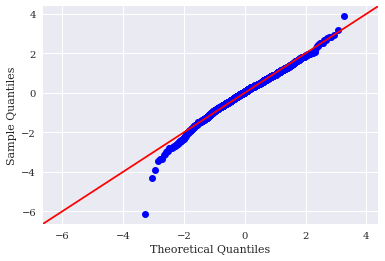

In [638]:
import statsmodels.api as sm

plt.hist(df_std_resid[0], bins=75)
plt.show()

plt.plot(df_std_resid[0])
plt.show()

df_std_resid[0].plot(kind='kde')
plt.show()

sm.qqplot(df_std_resid[0],  fit=True, line='45')
plt.show()

In [639]:
# Need in and out of sample for other purposes
# train, test = rets[:-n_time], rets[-n_time : H]

In [640]:
# Maximum likelihood yourself
import scipy.optimize as opt

r = rets[mylist[1]][:-n_time]

def GJR_sigma(mu, omega, alpha, gamma, beta, r):
    sigma_2 = []
    sigma_2.append(omega / (1 - alpha - gamma/2 - beta))

    for i in range(len(r)):
        if r[i]>0:
            sigma_2.append(omega + alpha* r[i]**2 + beta* sigma_2[i])
        else:
            sigma_2.append(omega + (alpha+gamma)*r[i]**2 + beta*sigma_2[i])
    
    return np.array(sigma_2)


def GJR_loglik(vP, r):
    mu = vP[0]
    omega = vP[1]
    alpha = vP[2]
    gamma = vP[3]
    beta = vP[4]
    
    sigma_2 = GJR_sigma(mu, omega, alpha, gamma, beta, r)
    
    #LogL = - np.sum(-np.log(np.array(sigma_2[1:])) - (r)**2/np.array(sigma_2[1:]))  # minus first to minimize
    LogL = 0.5 * (np.sum(np.log(2*math.pi)+np.log(sigma_2[:-1]) + ((r-mu)**2)/sigma_2[:-1])) 
    
    return LogL

In [641]:
cons = ({'type': 'ineq', 'func': lambda x: np.array(x)})
bnds = ((None,None),(0.0001,None),(0.00001,None),(0.00001,None),(0.00001,None))
vP0 = (0.026, 0.044, 0.103, 0.086, 0.788)

#OWN_res = opt.minimize(GJR_loglik, vP0, args=r, bounds = bnds, options={'disp':True}) 

OWN_res = opt.minimize(GJR_loglik, vP0, args=(r), method='BFGS', jac=None, tol=None, callback=None, 
         options={'gtol': 1e-05, 'norm': 1000, 'eps': 1.4901161193847656e-08, 'maxiter': None, 
                  'disp': False, 'return_all': False})

OWN_res

C:\Users\Ma-Bi\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:162: RuntimeWarning: overflow encountered in power
  return numpy.sum(numpy.abs(x)**ord, axis=0)**(1.0 / ord)
C:\Users\Ma-Bi\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log


      fun: 2152.7058980711577
 hess_inv: array([[ 3.11389458e-04, -1.28851907e-06,  1.57679426e-05,
        -9.38585785e-06, -5.79171035e-06],
       [-1.28851907e-06,  5.56756469e-05,  4.24743324e-05,
         4.75596525e-05, -1.42017937e-04],
       [ 1.57679426e-05,  4.24743324e-05,  4.18754431e-04,
        -2.05209939e-04, -3.17783341e-04],
       [-9.38585785e-06,  4.75596525e-05, -2.05209939e-04,
         6.84833427e-04, -1.56076749e-04],
       [-5.79171035e-06, -1.42017937e-04, -3.17783341e-04,
        -1.56076749e-04,  5.50220001e-04]])
      jac: array([-0.01379395, -0.20651245, -0.28759766, -0.09725952, -0.21749878])
  message: 'Optimization terminated successfully.'
     nfev: 126
      nit: 12
     njev: 18
   status: 0
  success: True
        x: array([0.0201446 , 0.02370555, 0.07549915, 0.08654   , 0.85554054])

In [642]:
OWN_res.x.round(3)

array([0.02 , 0.024, 0.075, 0.087, 0.856])

In [643]:
display(parameters[:].round(3))
display(std_error[:].round(3))
display(p_values[:].round(3))

array([[0.026, 0.044, 0.103, 0.086, 0.788],
       [0.027, 0.024, 0.078, 0.077, 0.855],
       [0.061, 0.052, 0.   , 0.173, 0.853],
       [0.045, 0.036, 0.   , 0.182, 0.855],
       [0.003, 0.023, 0.004, 0.081, 0.94 ],
       [0.027, 0.034, 0.033, 0.161, 0.817],
       [0.053, 0.035, 0.   , 0.204, 0.85 ],
       [0.04 , 0.044, 0.   , 0.151, 0.87 ],
       [0.046, 0.038, 0.041, 0.182, 0.823]])

array([[0.016, 0.019, 0.069, 0.05 , 0.07 ],
       [0.017, 0.009, 0.04 , 0.039, 0.034],
       [0.021, 0.012, 0.032, 0.038, 0.028],
       [0.017, 0.008, 0.019, 0.036, 0.024],
       [0.026, 0.009, 0.013, 0.018, 0.018],
       [0.014, 0.012, 0.042, 0.046, 0.055],
       [0.018, 0.007, 0.024, 0.035, 0.027],
       [0.019, 0.019, 0.037, 0.033, 0.061],
       [0.017, 0.01 , 0.042, 0.051, 0.029]])

array([[0.118, 0.019, 0.138, 0.088, 0.   ],
       [0.111, 0.011, 0.05 , 0.046, 0.   ],
       [0.003, 0.   , 1.   , 0.   , 0.   ],
       [0.007, 0.   , 1.   , 0.   , 0.   ],
       [0.922, 0.013, 0.763, 0.   , 0.   ],
       [0.06 , 0.005, 0.434, 0.   , 0.   ],
       [0.003, 0.   , 1.   , 0.   , 0.   ],
       [0.04 , 0.023, 1.   , 0.   , 0.   ],
       [0.007, 0.   , 0.327, 0.   , 0.   ]])

In [615]:
param_est = pd.DataFrame(parameters, columns=['mu', 'omega', 'alpha','gamma', 'beta'])
param_est.index  = mylist
param_est = param_est.round(3).T
param_est

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
mu,0.026,0.027,0.061,0.045,0.003,0.027,0.053,0.040,0.046
omega,0.044,0.024,0.052,0.036,0.023,0.034,0.035,0.044,0.038
alpha,0.103,0.078,0.000,0.000,0.004,0.033,0.000,0.000,0.041
gamma,0.086,0.077,0.173,0.182,0.081,0.161,0.204,0.151,0.182
beta,0.788,0.855,0.853,0.855,0.940,0.817,0.850,0.870,0.823


In [616]:
std_error = pd.DataFrame(std_error, columns=['mu', 'omega', 'alpha','gamma', 'beta'])
std_error.index  = mylist
std_error = std_error.round(3).T
std_error

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
mu,0.016,0.017,0.021,0.017,0.026,0.014,0.018,0.019,0.017
omega,0.019,0.009,0.012,0.008,0.009,0.012,0.007,0.019,0.010
alpha,0.069,0.040,0.032,0.019,0.013,0.042,0.024,0.037,0.042
gamma,0.050,0.039,0.038,0.036,0.018,0.046,0.035,0.033,0.051
beta,0.070,0.034,0.028,0.024,0.018,0.055,0.027,0.061,0.029


In [617]:
p_values = pd.DataFrame(p_values, columns=['mu', 'omega', 'alpha','gamma', 'beta'])
p_values.index  =mylist
p_values = p_values.round(3).T
p_values

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
mu,0.118,0.111,0.003,0.007,0.922,0.060,0.003,0.040,0.007
omega,0.019,0.011,0.000,0.000,0.013,0.005,0.000,0.023,0.000
alpha,0.138,0.050,1.000,1.000,0.763,0.434,1.000,1.000,0.327
gamma,0.088,0.046,0.000,0.000,0.000,0.000,0.000,0.000,0.000
beta,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [618]:
est_result = []

for i in range(len(param_est.index)):
    est_result.append(param_est.iloc[i])
    est_result.append(std_error.iloc[i])
    est_result.append(p_values.iloc[i])
    
est_result = pd.DataFrame(est_result)
est_result

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
mu,0.026,0.027,0.061,0.045,0.003,0.027,0.053,0.040,0.046
mu,0.016,0.017,0.021,0.017,0.026,0.014,0.018,0.019,0.017
mu,0.118,0.111,0.003,0.007,0.922,0.060,0.003,0.040,0.007
omega,0.044,0.024,0.052,0.036,0.023,0.034,0.035,0.044,0.038
omega,0.019,0.009,0.012,0.008,0.009,0.012,0.007,0.019,0.010
omega,0.019,0.011,0.000,0.000,0.013,0.005,0.000,0.023,0.000
alpha,0.103,0.078,0.000,0.000,0.004,0.033,0.000,0.000,0.041
alpha,0.069,0.040,0.032,0.019,0.013,0.042,0.024,0.037,0.042
alpha,0.138,0.050,1.000,1.000,0.763,0.434,1.000,1.000,0.327
gamma,0.086,0.077,0.173,0.182,0.081,0.161,0.204,0.151,0.182


In [619]:
#k = len(param_est.columns)
#ps = []
#for i in range(len(param_est.index)):
#    # Estimate rows
#    if i % 3 == 0 : 
#        for j in range(k):
#            if est_result.iloc[i+2][j] > 0.05:
#                est_result.iloc[i][j] = str(est_result.iloc[i][j])    # +'*'
#            else:
#                est_result.iloc[i][j] = est_result.iloc[i][j]
#                
#    # Std error row
#    elif i % 3 == 1:
#        est_result.iloc[i] = est_result.iloc[i]
#        
#    # P_value rows
#    else:
#        est_result = est_result.iloc[i]   
#        PS.append(i)
#
#for ps in PS:
#    est_result = est_result.drop(est_result.iloc[ps])  

## Forecast - one period ahead

In [761]:
# All mu (expected return)
F_mu = parameters[:, 0]
display(F_mu)

# Forecasted variances
F_var = forecast_variance
display(F_var)

#parameters

array([0.02572612, 0.02743108, 0.06116324, 0.0448615 , 0.00256625,
       0.02710437, 0.05284264, 0.03963235, 0.04551036])

array([0.57250059, 0.59500873, 0.81929529, 0.66171694, 1.549411  ,
       0.44556731, 0.71802026, 0.75863399, 0.82954371])

In [762]:
Omega_forecast = rets.cov()
np.fill_diagonal(Omega_forecast.values, F_var)
Omega_forecast.round(2)

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
IGF,0.57,0.52,0.54,0.45,0.67,0.42,0.44,0.51,0.52
IFGL,0.52,0.60,0.57,0.46,0.60,0.42,0.45,0.52,0.56
IXN,0.54,0.57,0.82,0.62,0.77,0.47,0.79,0.76,0.76
IXJ,0.45,0.46,0.62,0.66,0.58,0.42,0.57,0.57,0.57
VDE,0.67,0.60,0.77,0.58,1.55,0.45,0.66,0.83,0.72
KXI,0.42,0.42,0.47,0.42,0.45,0.45,0.40,0.44,0.46
SPGP,0.44,0.45,0.79,0.57,0.66,0.40,0.72,0.66,0.66
VIS,0.51,0.52,0.76,0.57,0.83,0.44,0.66,0.76,0.70
RXI,0.52,0.56,0.76,0.57,0.72,0.46,0.66,0.70,0.83


## one period ahead vol portfolio

In [763]:
# a. Find minimum variance weights
forecast_w_min = matrix_optimize.min_vol(noa=noa, omega=Omega_forecast)

# b. Compute annualized portfolio return
forecast_ret_min = port_ret(mu=F_mu,weights=forecast_w_min)

# c. Compute annualized portfolio volatility
forecast_vol_min = port_vol(omega=Omega_forecast,weights=forecast_w_min)

# d. Print results:
print('Minimum vol weights', forecast_w_min)
print('Annualized portfolio return = ', forecast_ret_min.round(3))
print('Annualized portfolio vol = ', forecast_vol_min.round(3))
print('Maximum Sharpe Ratio = ',(forecast_ret_min/forecast_vol_min).round(3),
      '=', -sharpe_ratio(mu=F_mu, omega=Omega_forecast,weights=forecast_w_min).round(3))

Minimum vol weights [ 0.024 -0.006  1.141  0.209 -0.003  0.954 -0.72  -0.291 -0.307]
Annualized portfolio return =  10.562
Annualized portfolio vol =  11.206
Maximum Sharpe Ratio =  0.943 = 0.943


## One period forecast efficient portfolio - given target return

In [764]:
# a. Find efficient weights given target return
forecast_w_eff = matrix_optimize.eff_vol(noa=noa, omega=Omega_forecast, mu=F_mu, target_return=30/252)

# b. Compute annualized portfolio return
forecast_ret_eff = port_ret(mu=F_mu, weights=forecast_w_eff)

# c. Compute annualized portfolio volatility
forecast_vol_eff = port_vol(omega=Omega_forecast, weights=forecast_w_eff)

# d. Print resuts:
print('Efficient weights', forecast_w_eff.round(2))
print('Annualized portfolio return = ', forecast_ret_eff.round(3))
print('Annualized portfolio vol = ', forecast_vol_eff.round(3))
print('Maximum Sharpe Ratio = ',(forecast_ret_eff/forecast_vol_eff).round(3),
      '=', -sharpe_ratio(mu=F_mu, omega=Omega_forecast,weights=forecast_w_eff).round(3))

Efficient weights [ 1.84 -0.43 -3.31  0.04 -1.85 -2.3   5.25  1.1   0.66]
Annualized portfolio return =  29.997
Annualized portfolio vol =  25.755
Maximum Sharpe Ratio =  1.165 = 1.165


In [765]:
## Effecient Frontier

forecast_z, forecast_front_vol, forecast_front_ret = efficient_frontier(min_weights = forecast_w_min, 
                                                                        eff_weights = forecast_w_eff, 
                                                                        omega = Omega_forecast, 
                                                                        mu = F_mu)

## Tangent Portfolio

In [766]:
forecast_opt, forecast_evols, forecast_erets, forecast_f_tangent = tangent_portfolio(front_vol=forecast_front_vol, 
                                                                                     front_ret=forecast_front_ret)

Optimal parameter values =  [ 0.      1.2615 14.9887]
Check that eq holds: [ 0.  0. -0.]


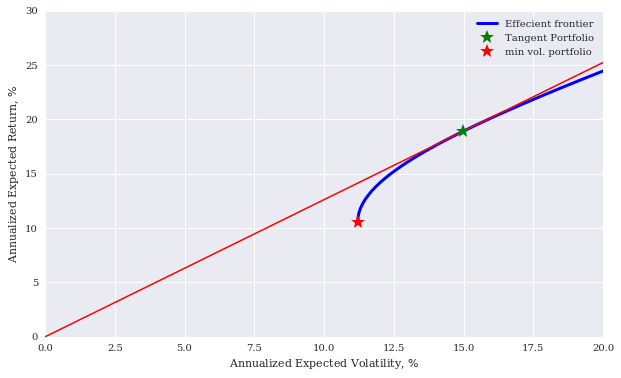

In [767]:
rf=0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

plt.plot(forecast_evols, forecast_erets, 'b', lw=3.0, label='Effecient frontier')

cx = np.linspace(0.0, 40.0)
plt.plot(cx, forecast_opt[0] + forecast_opt[1] * cx, 'r', lw=1.5)

plt.plot(forecast_opt[2], forecast_f_tangent, 'g*', markersize=15, label='Tangent Portfolio')
plt.plot(forecast_vol_min, forecast_ret_min, 'r*', markersize=15.0, label='min vol. portfolio')


plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,30])
plt.xlabel('Annualized Expected Volatility, $\%$')
plt.ylabel('Annualized Expected Return, $\%$')
# plt.title('Annualized Portfolio FHS Return and Volatility')
plt.legend()

plt.savefig('forecast_tangent_port.png', dpi=300, bbox_inches='tight')


## Forecast one-period Conclusion

In [768]:
# Weights: minimum vol, max Sharpe
conc_3 = np.vstack([mylist, forecast_w_min.round(3)])
conc_3 = np.vstack([conc_3, forecast_w_eff.round(3)])
conc_3 = np.vstack([conc_3, forecast_w_tan.round(3)])

# Portfolio return
P_R_3 = np.ones(4)
P_R_3[1:] = np.array([forecast_ret_min , forecast_ret_eff, forecast_ret_tan]).round(3)
conc_2 = np.column_stack((conc_3, P_R_3))

# Portfolio volatility
P_V_3 = np.ones(4)
P_V_3[1:] = np.array([forecast_vol_min , forecast_vol_eff, forecast_vol_tan]).round(3)
conc_3 = np.column_stack((conc_3, P_V_3))

# Portfolio Sharpe Ratio
P_SR_3 = np.ones(4)
P_SR_3[1:] = np.array([-sharpe_ratio(mu=F_mu, omega=forecast_omega,weights=forecast_w_min),
                       -sharpe_ratio(mu=F_mu, omega=forecast_omega,weights=forecast_w_eff), 
                       -sharpe_ratio(mu=F_mu, omega=forecast_omega,weights=forecast_w_tan)]).round(3)
conc_3 = np.column_stack((conc_2, P_SR_2))

conc_3 = pd.DataFrame(conc_2, index=['forecast', 'Minimum vol. portfolio', 
                                     'Target return portfolio', 'Tangent portfolio'])


conc_3.columns = conc_3.iloc[0]
conc_3 = conc_3.drop(conc_3.index[0])
conc_3.columns.values[[-3, -2, -1]] = ['Exp. return', 'Exp. volatility', 'Exp. SR']
conc_3

NameError: name 'forecast_w_tan' is not defined

## Simulation FHS

\begin{align}
    r_{t} &= \mu + \sigma_{t} z_{t} \\
    \sigma^2_{t} &= \omega + \alpha r_{t-1}^2 + \gamma 1_{r_{t-1}<0}r_{t-1} + \beta \sigma_{t-1}^2  \\
    z &\sim \textit{i.i.d. } \mathcal{N}(0,1)
\end{align}

In [645]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [646]:
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [671]:
# Need in and out of sample for other purposes
train, test = rets[:-n_time], rets[-n_time : H]

In [672]:
len(test)

60

In [742]:
# Filtered Historical Simulation
 
#npr.seed(741)
N = n_test # 10

# Create dictionaries
SIM_RET = {}
SIM_SIGMA = {}
ACC_RET = {}
AVG_RET = {}
AVG_VOL = {}

# Loop over assets
for j,x in enumerate(mylist):  #range(noa):

    # Define parameters for the given asset
    param = parameters[j]
    mu = param[0]
    omega = param[1]
    alpha = param[2]
    gamma = param[3]
    beta = param[4]
    acc_ret = []
    avg_ret = [] 
    avg_vol = []
    
    # Define vector for simulated sigma_(t+1) for GARCH(1,1)
    sim_sigma = np.empty(N)
    sim_sigma[0] = ((train[x][-1] - mu)/ std_resid[j][-n_test])       # sigma_t+1 is predetermined
    
    # Loop for simulations
    for i in range(5000):
        z = random.sample(list(std_resid[j][:-n_test]), N)            # Bootstrap random draw from std.res.
        sim_ret = np.empty(N)                                          # Define empty vector for simulated return
        
        # Loop for horizon
        for n in range(N-1):
            sim_ret[n] = mu + sim_sigma[n] * z[n]
            if sim_ret[n]>0:
                sim_sigma[n+1] =  math.sqrt(omega + alpha * sim_ret[n]**2 + beta * sim_sigma[n]**2)
            else:
                sim_sigma[n+1] = math.sqrt(omega + alpha * sim_ret[n]**2 + gamma * sim_ret[n]**2 
                                           + beta * sim_sigma[n]**2)
        
        acc_ret.append(np.sum(sim_ret))                               # all 50.000 accumulated return
        avg_ret.append(np.mean(sim_ret))                              # all 50.000 average return
        avg_vol.append(np.mean(sim_sigma))                            # all 50.000 average sigma 

    ACC_RET["FHS_{0}".format(x)] = acc_ret
    AVG_RET["FHS_{0}".format(x)] = avg_ret
    AVG_VOL["FHS_{0}".format(x)] = avg_vol

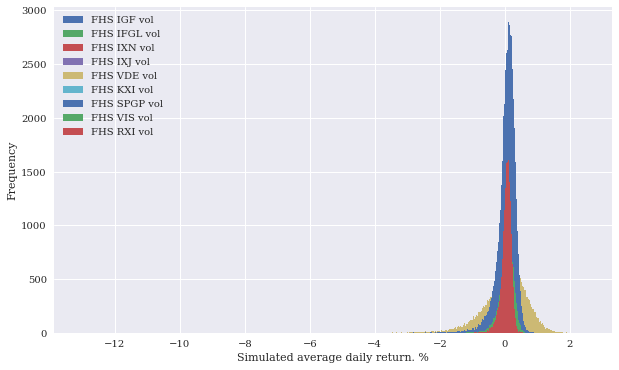

In [746]:
plt.figure(figsize=(10,6))

for i in mylist:
    plt.hist(AVG_RET['FHS_%s' %i], bins=500, label='FHS %s vol' %i)

plt.legend()
plt.xlabel('Simulated average daily return. %')
plt.ylabel('Frequency')
#plt.title('Distribution of Simmulated returns (FHS), %')

#plt.show()
plt.savefig('FHS_dist.png', dpi=300, bbox_inches='tight')

Now We have obtained estimates for the 30-period expected return and variance for each asset.

Assuming constant correlation between the assets, we have obtained a new covariance matrix. And expected return, so we can construct a new effecient portfolio. 

In [686]:
# Daily return (average):
FHS_mu = pd.DataFrame.from_dict(ACC_RET).mean()/N
display(FHS_mu.round(3))   # compare to rets.mean()

# Daily average volatilty:
FHS_var = (pd.DataFrame.from_dict(AVG_VOL).mean()**2)
display(FHS_var.round(3))  # compare to display(rets.var().round(3))

# Daily vol
FHS_vol = pd.DataFrame.from_dict(AVG_VOL).mean()
display(FHS_vol.round(3))

# Define list of labels
#FHS_label = FHS_vol.index

FHS_IGF     0.029
FHS_IFGL    0.027
FHS_IXN     0.046
FHS_IXJ     0.064
FHS_VDE    -0.027
FHS_KXI     0.064
FHS_SPGP    0.045
FHS_VIS     0.057
FHS_RXI     0.045
dtype: float64

FHS_IGF      0.592
FHS_IFGL     0.774
FHS_IXN      3.852
FHS_IXJ      0.596
FHS_VDE     26.694
FHS_KXI      1.125
FHS_SPGP     3.812
FHS_VIS      2.825
FHS_RXI      1.307
dtype: float64

FHS_IGF     0.769
FHS_IFGL    0.880
FHS_IXN     1.963
FHS_IXJ     0.772
FHS_VDE     5.167
FHS_KXI     1.061
FHS_SPGP    1.952
FHS_VIS     1.681
FHS_RXI     1.143
dtype: float64

In [687]:
FHS_omega = rets.cov()
np.fill_diagonal(FHS_omega.values, FHS_var)
FHS_omega.round(2)

,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI
IGF,0.59,0.52,0.54,0.45,0.67,0.42,0.44,0.51,0.52
IFGL,0.52,0.77,0.57,0.46,0.60,0.42,0.45,0.52,0.56
IXN,0.54,0.57,3.85,0.62,0.77,0.47,0.79,0.76,0.76
IXJ,0.45,0.46,0.62,0.60,0.58,0.42,0.57,0.57,0.57
VDE,0.67,0.60,0.77,0.58,26.69,0.45,0.66,0.83,0.72
KXI,0.42,0.42,0.47,0.42,0.45,1.12,0.40,0.44,0.46
SPGP,0.44,0.45,0.79,0.57,0.66,0.40,3.81,0.66,0.66
VIS,0.51,0.52,0.76,0.57,0.83,0.44,0.66,2.83,0.70
RXI,0.52,0.56,0.76,0.57,0.72,0.46,0.66,0.70,1.31


## FHS based minimum vol portfolio

In [688]:
# a. Find minimum variance weights
FHS_w_min = matrix_optimize.min_vol(noa=noa, omega=FHS_omega)

# b. Compute annualized portfolio return
FHS_ret_min = port_ret(mu=FHS_mu,weights=FHS_w_min)

# c. Compute annualized portfolio volatility
FHS_vol_min = port_vol(omega=FHS_omega,weights=FHS_w_min)

# d. Print results:
print('Minimum vol weights', FHS_w_min)
print('Annualized portfolio return = ', FHS_ret_min.round(3))
print('Annualized portfolio vol = ', FHS_vol_min.round(3))
print('Maximum Sharpe Ratio = ',(FHS_ret_min/FHS_vol_min).round(3),
      '=', -sharpe_ratio(mu=FHS_mu, omega=FHS_omega,weights=FHS_w_min).round(3))

Minimum vol weights [ 0.386  0.105 -0.017  0.441 -0.003  0.122  0.008 -0.006 -0.036]
Annualized portfolio return =  12.003
Annualized portfolio vol =  11.259
Maximum Sharpe Ratio =  1.066 = 1.066


## FHS efficient portfolio - given target return

In [689]:
# a. Find efficient weights given target return
FHS_w_eff = matrix_optimize.eff_vol(noa=noa, omega=FHS_omega, mu=FHS_mu, target_return=30/252)

# b. Compute annualized portfolio return
FHS_ret_eff = port_ret(mu=FHS_mu, weights=FHS_w_eff)

# c. Compute annualized portfolio volatility
FHS_vol_eff = port_vol(omega=FHS_omega, weights=FHS_w_eff)

# d. Print resuts:
print('Efficient weights', FHS_w_eff.round(2))
print('Annualized portfolio return = ', FHS_ret_eff.round(3))
print('Annualized portfolio vol = ', FHS_vol_eff.round(3))
print('Maximum Sharpe Ratio = ',(FHS_ret_eff/FHS_vol_eff).round(3),
      '=', -sharpe_ratio(mu=FHS_mu, omega=FHS_omega,weights=FHS_w_eff).round(3))

Efficient weights [-0.92 -0.43 -0.05  2.14 -0.03  0.44 -0.06  0.03 -0.11]
Annualized portfolio return =  29.99
Annualized portfolio vol =  19.079
Maximum Sharpe Ratio =  1.572 = 1.572


# Effecient frontier

In [690]:
FHS_z, FHS_front_vol, FHS_front_ret = efficient_frontier(min_weights=FHS_w_min,
                                                   eff_weights=FHS_w_eff, omega=FHS_omega, mu=FHS_mu)

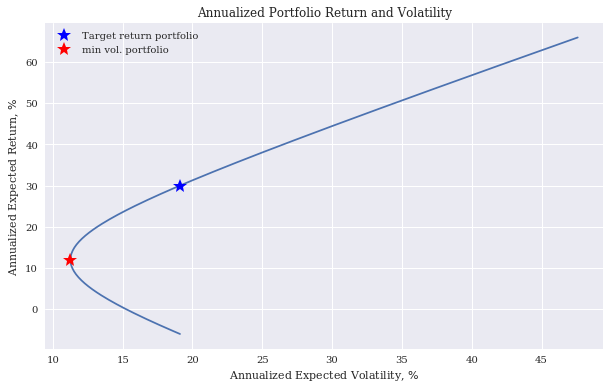

In [708]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

plt.plot(FHS_front_vol, FHS_front_ret)

plt.plot(FHS_vol_eff, FHS_ret_eff, 'b*', markersize=15.0, label='Target return portfolio')
plt.plot(FHS_vol_min, FHS_ret_min, 'r*', markersize=15.0, label='min vol. portfolio')

    
plt.xlabel('Annualized Expected Volatility, $\%$')
plt.ylabel('Annualized Expected Return, $\%$')
plt.title('Annualized Portfolio Return and Volatility')

plt.legend()
plt.show()

## Tangent Portfolio

In [692]:
FHS_opt, FHS_evols, FHS_erets, FHS_f_tangent = tangent_portfolio(front_vol=FHS_front_vol, front_ret=FHS_front_ret)

Optimal parameter values =  [ 0.      1.5815 16.6735]
Check that eq holds: [0. 0. 0.]


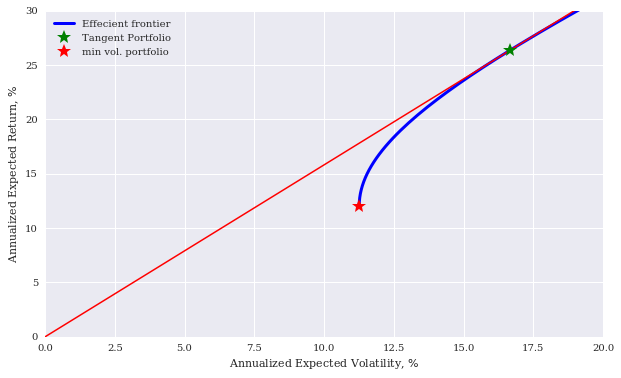

In [718]:
rf=0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

plt.plot(FHS_evols, FHS_erets, 'b', lw=3.0, label='Effecient frontier')

cx = np.linspace(0.0, 40.0)
plt.plot(cx, FHS_opt[0] + FHS_opt[1] * cx, 'r', lw=1.5)

plt.plot(FHS_opt[2], FHS_f_tangent, 'g*', markersize=15, label='Tangent Portfolio')
plt.plot(FHS_vol_min, FHS_ret_min, 'r*', markersize=15.0, label='min vol. portfolio')

# plot individual ETFs
# for i,type in enumerate(FHS_label):
#     x2 = math.sqrt(FHS_var[type]*252)
#     y2 = FHS_mu[type]*252
#     plt.scatter(x2, y2, marker='o')  
#     plt.text(x2+0.05, y2+0.05, type, fontsize=9)


plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,30])
plt.xlabel('Annualized Expected Volatility, $\%$')
plt.ylabel('Annualized Expected Return, $\%$')
# plt.title('Annualized Portfolio FHS Return and Volatility')
plt.legend()

plt.savefig('FHS_tangent_port.png', dpi=300, bbox_inches='tight')

In [719]:
# a. Find tangent portfolio weight
ind = np.where(np.array(FHS_front_vol.round(0)==FHS_opt[2].round(0)))[0][0]
FHS_w_tan = FHS_z[ind]

# b. Compute annualized portfolio return
FHS_ret_tan = port_ret(mu=FHS_mu,weights=FHS_w_tan)

# c. Compute annualized portfolio volatility
FHS_vol_tan = port_vol(omega=FHS_omega,weights=FHS_w_tan)

# d. Print resuts:
print('Efficient weights', FHS_w_tan.round(3))
print('Annualized portfolio return = ', FHS_ret_tan.round(3))
print('Annualized portfolio vol = ', FHS_vol_tan.round(3))
print('Maximum Sharpe Ratio = ',(FHS_ret_tan/FHS_vol_tan).round(3),
      '=', -sharpe_ratio(mu=FHS_mu, omega=FHS_omega,weights=FHS_w_tan).round(5))

Efficient weights [-0.753 -0.362 -0.043  1.915 -0.03   0.396 -0.05   0.028 -0.102]
Annualized portfolio return =  27.64
Annualized portfolio vol =  17.493
Maximum Sharpe Ratio =  1.58 = 1.58008



# Conclusion

In [720]:
# Weights: minimum vol, max Sharpe
conc_2 = np.vstack([mylist, FHS_w_min.round(3)])
conc_2 = np.vstack([conc_2, FHS_w_eff.round(3)])
conc_2 = np.vstack([conc_2, FHS_w_tan.round(3)])

# Portfolio return
P_R_2 = np.ones(4)
P_R_2[1:] = np.array([FHS_ret_min , FHS_ret_eff, FHS_ret_tan]).round(3)
conc_2 = np.column_stack((conc_2, P_R_2))

# Portfolio volatility
P_V_2 = np.ones(4)
P_V_2[1:] = np.array([FHS_vol_min , FHS_vol_eff, FHS_vol_tan]).round(3)
conc_2 = np.column_stack((conc_2, P_V_2))

# Portfolio Sharpe Ratio
P_SR_2 = np.ones(4)
P_SR_2[1:] = np.array([-sharpe_ratio(mu=FHS_mu, omega=FHS_omega,weights=FHS_w_min),
                       -sharpe_ratio(mu=FHS_mu, omega=FHS_omega,weights=FHS_w_eff), 
                       -sharpe_ratio(mu=FHS_mu, omega=FHS_omega,weights=FHS_w_tan)]).round(3)
conc_2 = np.column_stack((conc_2, P_SR_2))

conc_2 = pd.DataFrame(conc_2, index=['FHS', 'Minimum vol. portfolio', 
                                     'Target return portfolio', 'Tangent portfolio'])


conc_2.columns = conc_2.iloc[0]
conc_2 = conc_2.drop(conc_2.index[0])
conc_2.columns.values[[-3, -2, -1]] = ['Exp. return', 'Exp. volatility', 'Exp. SR']
conc_2

FHS,IGF,IFGL,IXN,IXJ,VDE,KXI,SPGP,VIS,RXI,Exp. return,Exp. volatility,Exp. SR
Minimum vol. portfolio,0.386,0.105,-0.017,0.441,-0.003,0.122,0.008,-0.006,-0.036,12.003,11.259,1.066
Target return portfolio,-0.924,-0.432,-0.047,2.137,-0.034,0.437,-0.059,0.033,-0.112,29.99,19.079,1.572
Tangent portfolio,-0.753,-0.362,-0.043,1.915,-0.03,0.396,-0.05,0.028,-0.102,27.64,17.493,1.58


In [722]:
# CONC_2 = conc_2.round(2)
# print(CONC_2.astype(float).round(2).drop('Target return portfolio', axis=0).to_latex())

# Backtest

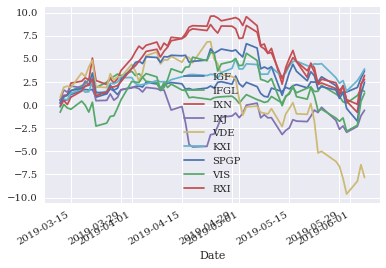

In [723]:
train, test = rets[:-n_time], rets[-n_time : H] #H
test.cumsum().plot()

In [724]:
#Test period accumulated return
hist_perform_ret = hist_w_tan.dot(test.cumsum().iloc[-1])
print('Hist portfolio acc. return = ',hist_perform_ret*1/(n_time/252))

FHS_perform_ret = FHS_w_tan.dot(test.cumsum().iloc[-1])
print('FHS portfolio acc. return = ',FHS_perform_ret*1/(n_time/252))

Hist portfolio acc. return =  26.656078337955325
FHS portfolio acc. return =  -7.8475807094426555


In [725]:
hist_w_tan.dot(test.cov().dot(hist_w_tan))

1.6195326000435526

In [726]:
FHS_w_tan.dot(test.cov().dot(FHS_w_tan))

1.789424016773569

In [700]:
# 30- days horizon
#100
Hist portfolio acc. return =  11.571274359634906
FHS portfolio acc. return =  39.8931489147672
0.9019729718735479
2.718600967648204

# 120:
Hist portfolio acc. return =  5.038517836622628
FHS portfolio acc. return =  3.2610089159815496
0.848260021127996
0.49860629294059067

# 150
Hist portfolio acc. return =  20.85505777248605
FHS portfolio acc. return =  18.221088932545946
2.0777141462437507
1.8621782685692136

#200


#250 


#300
Hist portfolio acc. return =  1.6063655024659689
FHS portfolio acc. return =  0.8415404889540925
3.5084938085672253
0.727601984761591

SyntaxError: invalid syntax (<ipython-input-700-1406ec676e88>, line 3)